In [97]:
# Ensure plots display inline
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve,
    f1_score
)
import os


In [98]:

# 1. Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [99]:
# Convert to binary classification: 1 if setosa, 0 otherwise
y_binary = (y == 0).astype(int)  # 0 = setosa in original


In [100]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [101]:

# 3. Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [102]:
# 4. Predict probabilities and classes
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

In [103]:
# 5. Metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_scores)
f1 = f1_score(y_test, y_pred)

In [104]:

# 6. Save and plot graphs
output_dir = "iris_classification_graphs"
os.makedirs(output_dir, exist_ok=True)

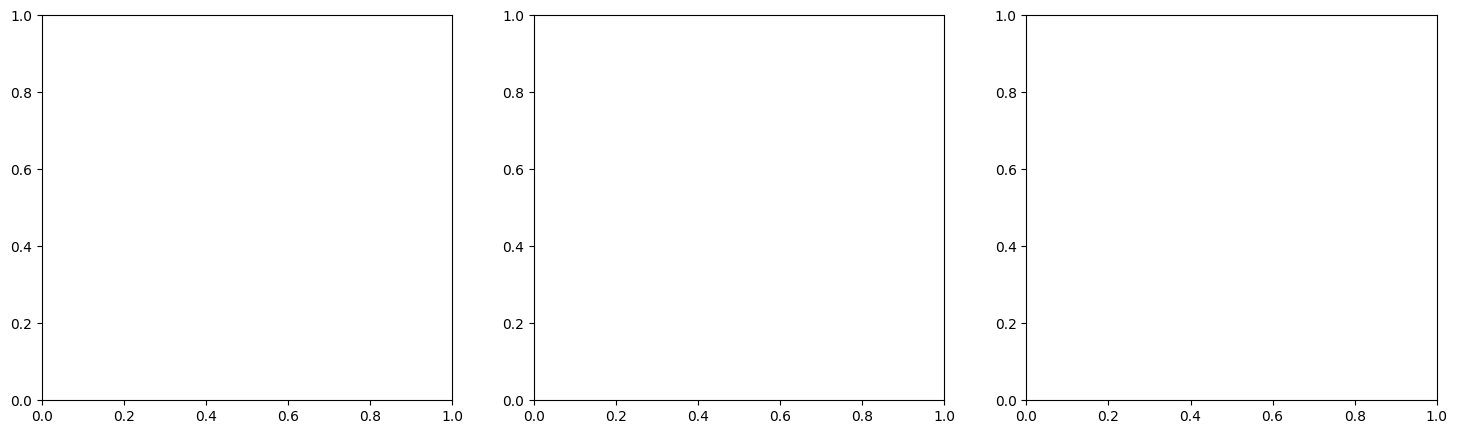

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

In [106]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Setosa", "Setosa"])
disp.plot(ax=axs[0])
axs[0].set_title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix')

In [107]:
# ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve')
axs[1].legend(loc="lower right")

In [108]:
# Precision-Recall Curve
axs[2].plot(recall, precision, color='blue', lw=2, label=f'F1 Score = {f1:.2f}')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Precision-Recall Curve')
axs[2].legend(loc="lower left")

In [109]:
# Save figure
plt.tight_layout()
full_plot_path = os.path.join(output_dir, "all_metrics.png")
plt.savefig(full_plot_path)
plt.show()

<Figure size 640x480 with 0 Axes>

In [110]:
# Show saved file paths
print("✅ Graphs saved to:")
print(f"• Combined Metrics Image:  {full_plot_path}")

✅ Graphs saved to:
• Combined Metrics Image:  iris_classification_graphs/all_metrics.png


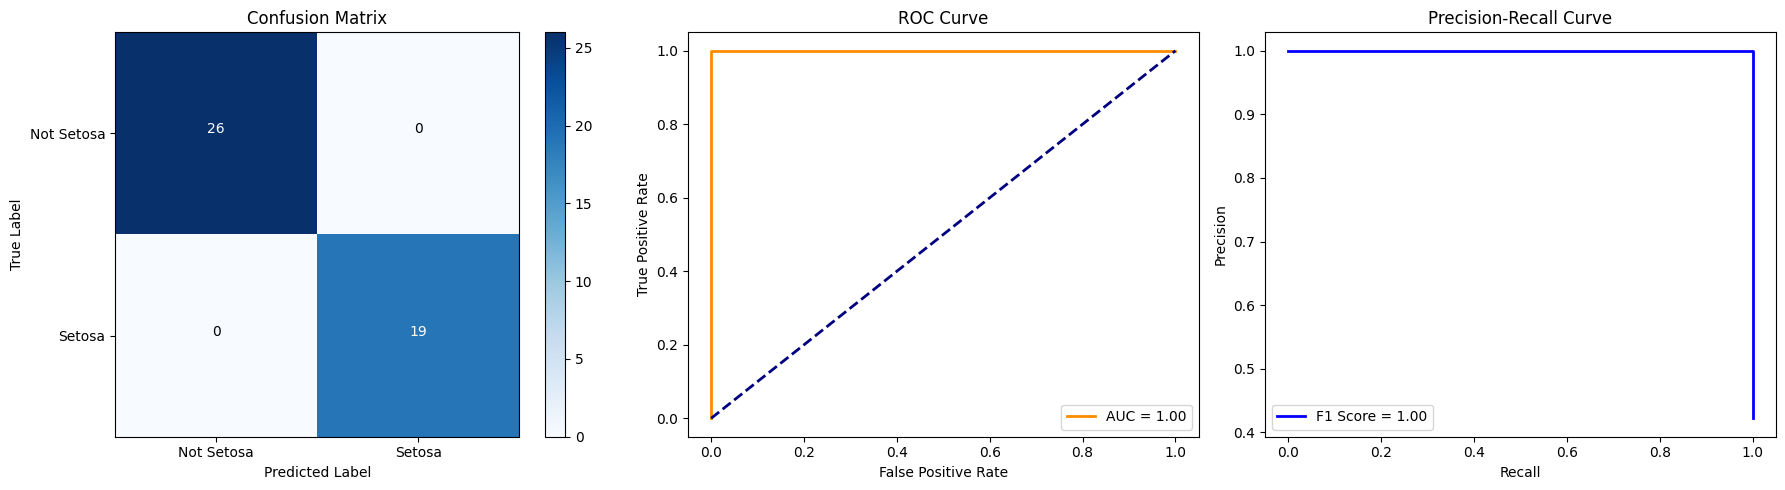

✅ Graphs saved to: iris_classification_graphs/all_metrics_fixed.png


In [111]:
# Ensure inline plotting
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve, f1_score
)
import os

# Load the iris dataset
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Setosa vs. not

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict scores and labels
y_scores = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Compute metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_scores)
f1 = f1_score(y_test, y_pred)

# Output folder
output_dir = "iris_classification_graphs"
os.makedirs(output_dir, exist_ok=True)

# Plot all metrics
plt.figure(figsize=(18, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["Not Setosa", "Setosa"])
plt.yticks(tick_marks, ["Not Setosa", "Setosa"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > 1 else "black")

# ROC Curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='blue', lw=2, label=f'F1 Score = {f1:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")

# Save and show
plt.tight_layout()
save_path = os.path.join(output_dir, "all_metrics_fixed.png")
plt.savefig(save_path)
plt.show()

print(f"✅ Graphs saved to: {save_path}")
